### What is `scipy.spatial`?

*scipy.spatial* is a powerful module when it comes to working with geometrical data or any kind of spatial data. It’s basically your toolbox for handling distances, shapes, nearest neighbors, and much more when you’re dealing with points in space (2D, 3D, or even higher dimensions).

Imagine you have a map, and you want to calculate the distance between different cities (points). Or maybe you want to find out which city is the closest to a particular point. All of this becomes easy with `scipy.spatial`. It also helps in creating boundaries around points (convex hulls), dividing areas into regions (Voronoi diagrams), or even finding clusters of points.

Let’s break it down in a way that feels comfortable and understandable, the Indian style! Step-by-step, with proper focus on concepts and examples.

### Functions in `scipy.spatial`

### 1. Distance Calculation: **Finding Distances Between Points**

In geometry, one of the most basic yet essential operations is measuring distance between points. Suppose you have multiple points, and you want to find out the pairwise distances between them or even the distance between two sets of points. This is super important for things like clustering, nearest neighbor search, and even routing in logistics.

### Example 1: Pairwise Distances with `pdist()`

Here, `pdist()` is used to compute the distances between every pair of points in an array.

In [4]:
from scipy.spatial import distance
import numpy as np

points = np.array([[1, 2], [3, 4], [5, 6]])
dist_matrix = distance.pdist(points, metric='euclidean')
print(dist_matrix)

[2.82842712 5.65685425 2.82842712]


- You have three points here: (1,2), (3,4), and (5,6).
- `pdist()` calculates the distance between every pair of points using Euclidean distance (the straight-line distance).
- The result is a 1D array that contains distances between each pair.

### Distance Between Two Sets of Points with `cdist()`

Now, if you have two arrays of points and want to calculate distances between each point in the first array and all points in the second array, `cdist()` is your tool.

In [5]:
points1 = np.array([[1, 2], [3, 4]])
points2 = np.array([[5, 6], [7, 8]])
distances = distance.cdist(points1, points2, metric='euclidean')
print(distances)

[[5.65685425 8.48528137]
 [2.82842712 5.65685425]]


- This calculates distances between all points in `points1` and `points2`. You get a matrix where each element is the distance between a point from `points1` and one from `points2`.

So, whenever you have points and you want to calculate distances (which is very common in machine learning, clustering, etc.), `pdist()` and `cdist()` are your go-to functions!

### Convex Hull: **Drawing the Outer Boundary Around Points**

Now, let’s talk about **convex hulls**. Imagine you have a set of points scattered in space. The convex hull is like a rubber band that stretches around the outermost points, forming a polygon that encloses all the points inside it.

Why is this useful? Well, it helps in defining the shape of data, especially in areas like computer graphics, pattern recognition, and geographic data analysis.

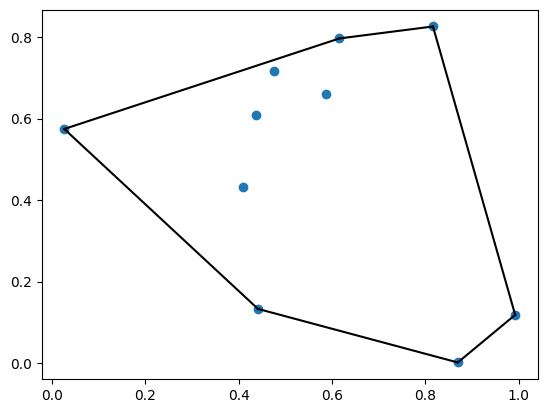

In [8]:
from scipy.spatial import ConvexHull
import numpy as np
import matplotlib.pyplot as plt

points = np.random.rand(10, 2)  # 10 random points in 2D
hull = ConvexHull(points)

plt.plot(points[:,0], points[:,1], 'o')  # Plotting the points
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')  # Plotting the hull
plt.show()

- You generate 10 random points in 2D. `ConvexHull()` calculates the convex hull, which is the boundary formed by connecting the outermost points.
- `simplices` gives you the edges of the hull, which you then plot.

Convex hulls are useful for defining the boundary of a cluster of points and identifying the "shape" of your data.

### Voronoi Diagrams: **Dividing Space Based on Nearest Points**

A **Voronoi diagram** divides space into regions where each region is associated with the nearest point. Imagine you have several points scattered across a map, and you want to assign territories to these points. Each point “owns” the region closest to it, and this is precisely what Voronoi diagrams do.

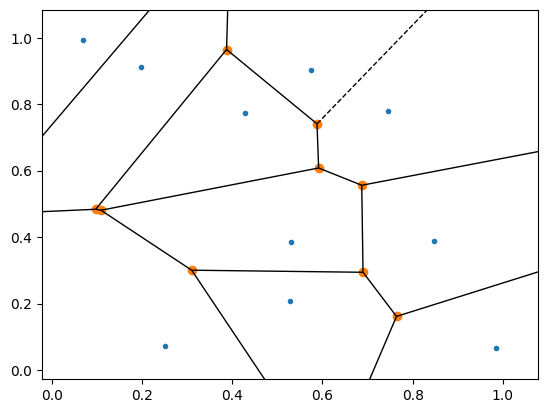

In [6]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import numpy as np
import matplotlib.pyplot as plt

points = np.random.rand(10, 2)  # 10 random points in 2D
vor = Voronoi(points)

voronoi_plot_2d(vor)  # Plotting the Voronoi diagram
plt.show()

- You generate random points and pass them to `Voronoi()`, which creates a Voronoi diagram.
- `voronoi_plot_2d()` helps you visualize this diagram, showing how space is divided into regions where each region is closest to a specific point.

This kind of division is widely used in fields like geography, computer vision, and resource allocation

### KDTree and cKDTree: **Efficient Search for Nearest Neighbors**

Now, what if you have a large dataset and you want to search for the nearest point or neighbor to a given point? **KDTree** and **cKDTree** are data structures designed to do exactly that, and they do it very efficiently.

Imagine you are playing a game where you need to find which enemy is closest to you—KDTree can help you figure that out quickly!

In [1]:
from scipy.spatial import KDTree
import numpy as np

points = np.random.rand(10, 2)  # 10 random points
tree = KDTree(points)
query_point = [0.1, 0.2]
dist, index = tree.query(query_point)
print(f"Nearest point: {points[index]}, Distance: {dist}")

Nearest point: [0.00157259 0.2776522 ], Distance: 0.12537072528135054


- Using `query()`, you find the nearest point to your query point `[0.1, 0.2]` and return its distance.
- You create a `KDTree` with random points

This is super fast, even if you have millions of points. That’s why it’s used in algorithms like nearest neighbor search, collision detection, and even machine learning.

### Other Key Tools

- **Delaunay Triangulation**: This is used to divide a set of points into triangles in the most efficient way possible. It’s used for things like mesh generation and interpolation.

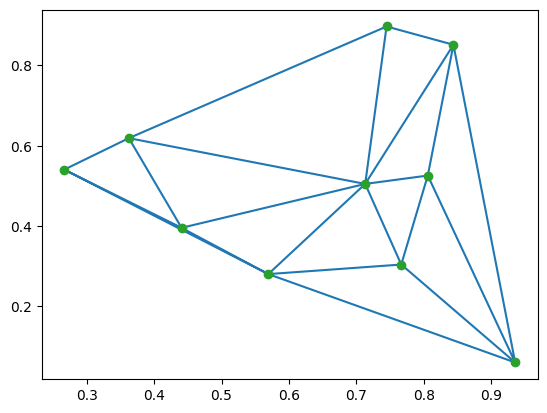

In [1]:
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import numpy as np

points = np.random.rand(10, 2)
tri = Delaunay(points)

plt.triplot(points[:, 0], points[:, 1], tri.simplices)
plt.plot(points[:, 0], points[:, 1], 'o')
plt.show()

- **scipy.spatial.distance** has several other distance metrics, like:
    - **Manhattan Distance**: Sum of absolute differences.
    - **Cosine Distance**: Measures how similar two points are based on their direction.
    - **Mahalanobis Distance**: Takes into account the correlations between variables.

### Delaunay Triangulation: **Efficiently Splitting Space into Triangles**

Delaunay triangulation is a way to divide a set of points into triangles such that no point is inside the circumcircle of any triangle. It’s useful in things like terrain modeling, mesh generation, and finite element analysis.

**Fun Fact**: In India, Delaunay triangulation is used in geographical terrain models, like those of the Himalayan regions, where creating models of land surface is crucial.

Let’s understand it with an example!

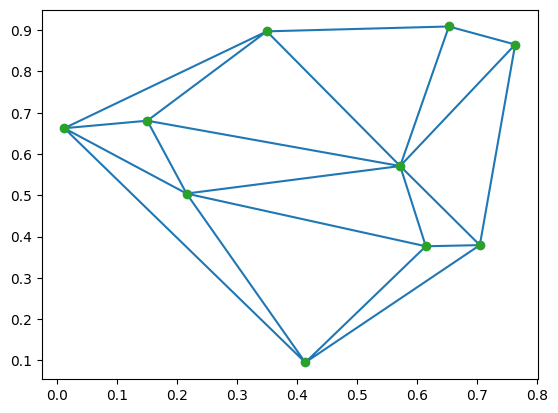

In [2]:
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import numpy as np

points = np.random.rand(10, 2)  # Random points in 2D space
tri = Delaunay(points)  # Compute Delaunay triangulation

# Plotting the triangulation
plt.triplot(points[:, 0], points[:, 1], tri.simplices)
plt.plot(points[:, 0], points[:, 1], 'o')
plt.show()

- We generate 10 random points in 2D space.
- `Delaunay(points)` calculates the Delaunay triangulation.
- We use `plt.triplot()` to visualize the triangles formed by the triangulation.

This is super useful in computational geometry for dividing a plane into non-overlapping triangles.

### **Convex Hull Properties and Volume Calculation**

The **Convex Hull** isn’t just a boundary! It can also give us extra details like its volume (for 3D points) and area (for 2D points).

In [4]:
from scipy.spatial import ConvexHull
import numpy as np
points_2d = np.random.rand(10, 2)
hull_2d = ConvexHull(points_2d)
print(f"Area of 2D Convex Hull: {hull_2d.area}")
points_3d = np.random.rand(30, 3)
hull_3d = ConvexHull(points_3d)
print(f"Volume of 3D Convex Hull: {hull_3d.volume}")

Area of 2D Convex Hull: 2.7148363785059777
Volume of 3D Convex Hull: 0.44157478527851085


- In 3D, the convex hull has a **volume**, like the amount of space enclosed by the outer points.
    - In 2D, the convex hull has an **area**, which is the size of the shape formed by the outer points.

Convex Hull is super important in 3D modeling applications like computer graphics, where you want to create boundaries around objects.

### **Voronoi Ridge Points and Vertices**

We’ve already touched on Voronoi diagrams. Now, let’s go deeper! Voronoi diagrams don’t just split space; they also define **ridge points** and **vertices**. The ridges are the edges separating regions, while the vertices are points where these edges meet.

Let’s extract those points!

Ridge points:
[[4 1]
 [4 2]
 [4 9]
 [0 7]
 [0 8]
 [0 5]
 [0 1]
 [0 9]
 [8 5]
 [8 3]
 [8 7]
 [5 1]
 [1 9]
 [6 3]
 [6 2]
 [6 7]
 [6 9]
 [3 7]
 [3 2]
 [2 9]
 [7 9]]
Vertices:
[[0.46075227 0.198854  ]
 [0.7921906  0.6862086 ]
 [0.07937566 1.48596006]
 [0.45844948 0.19912128]
 [0.25517063 0.15318853]
 [0.2769723  0.46163815]
 [0.37895896 0.56197308]
 [0.40178743 0.55173972]
 [0.793732   0.24110197]
 [0.62690428 0.29561279]
 [0.72673464 0.61824   ]
 [0.52723073 0.52570176]]


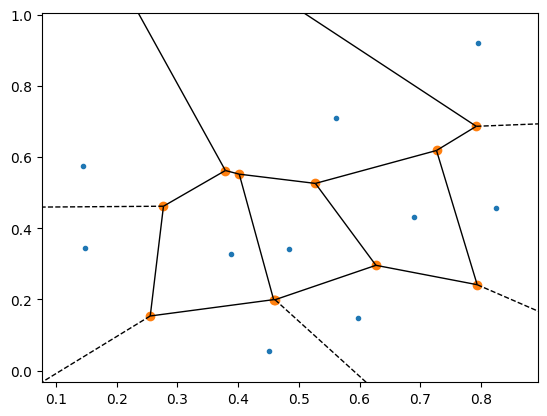

In [7]:
from scipy.spatial import Voronoi
import numpy as np
import matplotlib.pyplot as plt

points = np.random.rand(10, 2)
vor = Voronoi(points)

# Ridge points and vertices
print("Ridge points:")
print(vor.ridge_points)
print("Vertices:")
print(vor.vertices)

# Plot Voronoi diagram
voronoi_plot_2d(vor)
plt.show()

- **Ridge points** are the pairs of points that form the boundaries between regions.
- **Vertices** are points where these boundaries meet.

This additional information is important in applications where you need to understand the relationships between different regions, like in telecommunications (cell towers coverage, etc.).

### **KDTree Query Ball Point and Radius Searches**

We’ve seen how to search for the nearest neighbors using KDTree, but there’s more! Sometimes, you don’t just want the nearest point—you might want to find all points within a certain radius from a given point. This is called a **radius search**.

In [8]:
from scipy.spatial import KDTree
import numpy as np

points = np.random.rand(10, 2)  # Random points
tree = KDTree(points)
query_point = [0.5, 0.5]
radius = 0.3
indices = tree.query_ball_point(query_point, radius)

print(f"Points within radius {radius}: {points[indices]}")

Points within radius 0.3: [[0.60163177 0.58115573]
 [0.42403984 0.35728342]
 [0.39377483 0.52596588]
 [0.58390111 0.5699406 ]
 [0.33613518 0.72583156]]


- `query_ball_point()` returns all points within a given **radius** of a query point.
- This is useful when you want to search for points within a specific distance, such as in proximity searches in a map or finding nearby restaurants.

### **Spherical Voronoi Diagrams: Dividing Space on a Sphere**

A **Spherical Voronoi diagram** is like a Voronoi diagram, but instead of dividing flat space, it divides the surface of a sphere. This is useful for things like dividing the Earth into regions based on points (like cities, radio towers, etc.).

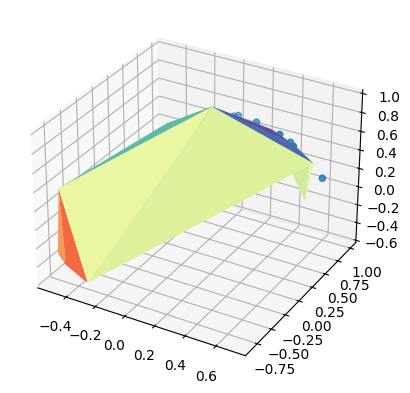

In [9]:
from scipy.spatial import SphericalVoronoi
import numpy as np
import matplotlib.pyplot as plt

# Create random points on the surface of a unit sphere
points = np.random.rand(10, 3)
points /= np.linalg.norm(points, axis=1)[:, np.newaxis]  # Normalize to unit sphere

sv = SphericalVoronoi(points)
sv.sort_vertices_of_regions()

# Plot the spherical Voronoi diagram
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2])
ax.plot_trisurf(sv.vertices[:, 0], sv.vertices[:, 1], sv.vertices[:, 2], triangles=sv.regions, cmap='Spectral')

plt.show()

- You generate random points on the surface of a unit sphere.
- `SphericalVoronoi()` calculates the regions on the sphere that are closest to each point.
- The result is a spherical Voronoi diagram, which you can plot in 3D.

This is super handy for global applications, such as satellite communication, where you need to divide the Earth into regions based on the nearest ground stations.

### **Spatial Transformations: Working with Coordinates and Projections**

In spatial analysis, you often need to work with transformations between different coordinate systems. For example, converting between Cartesian (x, y, z) and spherical coordinates (r, theta, phi).

In [10]:
from scipy.spatial import distance

# Convert Cartesian to Spherical Coordinates
def cartesian_to_spherical(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z / r)
    phi = np.arctan2(y, x)
    return r, theta, phi

x, y, z = 3, 4, 5
r, theta, phi = cartesian_to_spherical(x, y, z)
print(f"Spherical Coordinates: r={r}, theta={theta}, phi={phi}")

Spherical Coordinates: r=7.0710678118654755, theta=0.7853981633974484, phi=0.9272952180016122


Converting between Cartesian and spherical coordinates is essential for tasks like dealing with data on the surface of the Earth or analyzing points in 3D space.

## Lets prectice some questions 

### Distance Calculation between Two Points in 2D
> Question: How can you calculate the Euclidean distance between two points in a 2D space?

In [11]:
from scipy.spatial import distance
import matplotlib.pyplot as plt

# Points
point1 = (2, 3)
point2 = (5, 7)

# Calculate Distance
euclidean_distance = distance.euclidean(point1, point2)
print(f"Euclidean Distance: {euclidean_distance}")

Euclidean Distance: 5.0


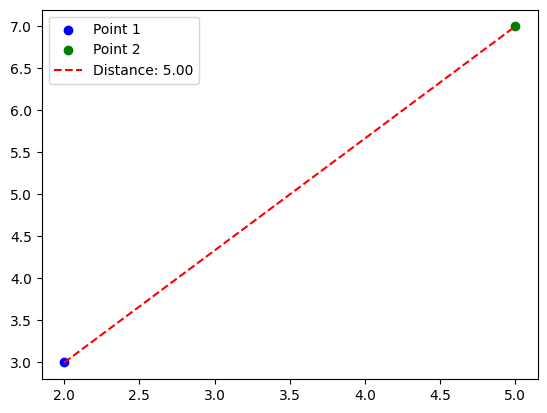

In [12]:
plt.scatter(*point1, color='blue', label='Point 1')
plt.scatter(*point2, color='green', label='Point 2')
plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 'r--', label=f'Distance: {euclidean_distance:.2f}')
plt.legend()
plt.show()

### Compute Pairwise Distances between a Set of Points
> Question: How to find the pairwise Euclidean distances between multiple points in a dataset?

In [13]:
import numpy as np

# Dataset of points
points = np.random.rand(5, 2)  # 5 random 2D points

# Compute pairwise distances
pairwise_distances = distance.cdist(points, points, 'euclidean')
print("Pairwise Distances:\n", pairwise_distances)

Pairwise Distances:
 [[0.         0.79188697 1.03978855 0.84935661 0.62953566]
 [0.79188697 0.         0.35791717 0.06249371 0.28834582]
 [1.03978855 0.35791717 0.         0.30597675 0.4125421 ]
 [0.84935661 0.06249371 0.30597675 0.         0.3146927 ]
 [0.62953566 0.28834582 0.4125421  0.3146927  0.        ]]


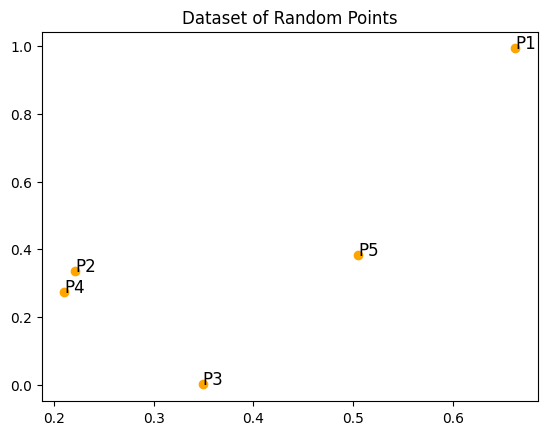

In [14]:
plt.scatter(points[:, 0], points[:, 1], color='orange')
for i, point in enumerate(points):
    plt.text(point[0], point[1], f'P{i+1}', fontsize=12)
plt.title('Dataset of Random Points')
plt.show()

### Finding the Nearest Neighbor using KDTree
> Question: How to find the nearest neighbor of a specific point using KDTree?

In [15]:
from scipy.spatial import KDTree

# Random points in 2D
points = np.random.rand(10, 2)
tree = KDTree(points)
query_point = [0.4, 0.6]

# Find nearest neighbor
dist, index = tree.query(query_point)
nearest_point = points[index]

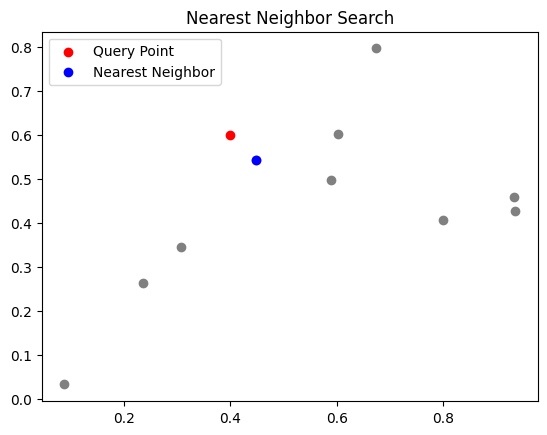

In [16]:
plt.scatter(points[:, 0], points[:, 1], color='gray')
plt.scatter(query_point[0], query_point[1], color='red', label='Query Point')
plt.scatter(nearest_point[0], nearest_point[1], color='blue', label='Nearest Neighbor')
plt.legend()
plt.title('Nearest Neighbor Search')
plt.show()

### Visualizing a Voronoi Diagram for a Set of Points
> Question: How to generate and visualize a Voronoi diagram for a random set of 2D points?

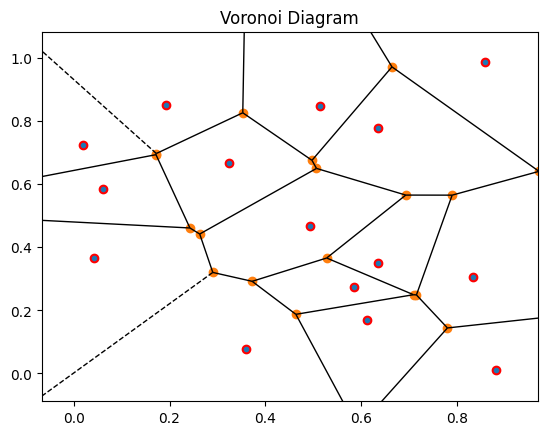

In [18]:
from scipy.spatial import Voronoi, voronoi_plot_2d

# Generate random points
points = np.random.rand(15, 2)

# Compute Voronoi diagram
vor = Voronoi(points)
voronoi_plot_2d(vor)
plt.scatter(points[:, 0], points[:, 1], color='red')
plt.title('Voronoi Diagram')
plt.show()

###  Creating a Delaunay Triangulation and Plotting It
> Question: How to perform Delaunay triangulation on a set of points?

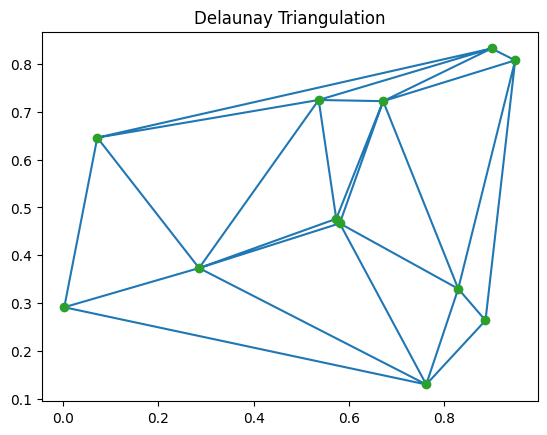

In [19]:
from scipy.spatial import Delaunay

# Random points
points = np.random.rand(12, 2)

# Compute Delaunay triangulation
tri = Delaunay(points)

# Plotting
plt.triplot(points[:, 0], points[:, 1], tri.simplices)
plt.plot(points[:, 0], points[:, 1], 'o')
plt.title('Delaunay Triangulation')
plt.show()